# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Семенов Александр, вариант 61.

## Цель работы

Формирование представления об аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод

Бинарный метод - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Обоснование алгоритма: число $n$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старший бит (единица). Затем в цикле просматриваются биты от старшего к младшему: на каждой итерации $x$ умножается на себя, при этом если очередной бит числа равен 1, то результат произведения еще и домножается на $x$ изначальный. 

Количество операций, требуемых для возведения числа $x$ в степень $n$, для бинарного метода равно $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ - сумма цифр двоичной записи числа $n$.

#### Метод множителей

Метод множителей - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $k\in \mathbb{N}$.

Обоснование алгоритма: Сперва производится поиск минимального простого делителя числа $k$ ($k=i \cdot j$), где $i$ - минимальный простой делитель числа $k$). Далее при помощи бинарного метода число $x$ возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^k$. Если $k$ - простое число, то алгоритм сначала возводит число $x$ в степень $k-1$, а потом домножает на $x$, получая тем самым $x^k$.


#### Аддитивные цепочки

Аддитивная цепочка - это последовательность натуральных чисел, начиная с 1, в которой каждый последующий элемент является суммой каких-то двух предыдущих элементов (возможно использование одного и того же элемента).

Длинна аддитивной цепочки $l(n)$: $1 = a_0, a_1, a_2, ... , a_m = n$, - количество элементов в ней.

Свойства аддитивных цепочек:
1. $l(n) \leqslant \lambda(n)+\nu(n)-1$;
2. $l(nm)\leqslant l(n) + l(m)$.

$a_i=a_j+a_k$ - шаг аддитивной цепочки, $i \in \{1,2 \dots m\}$, $0\leqslant k\leqslant j < i$

Типы шагов в аддитивной цепочке:
1. Шаг i называют удвоением, если $i - 1 = k = j$;
2. Шаг i называют звездным, если $j = i - 1$, $k \in \{0, \dots, i-1\}$;
3. Шаг i называют малым, если $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

#### Теорема Брауэра

Для некоторого $k<log_2(log_2(n))$ верно: $l(n)<(1+k^{-1}) \cdot \lceil log_2(n) \rceil +2^{k-1}-k+2$

При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верны следующие следствия:
1. $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$
2. Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Алгоритм Брауэра

Алгоритм Брауэра позволяет найти приближенную аддитивную цепочку для некоторого числа $n \in \mathbb{N}$. Задаются $n,k$, для которых Брауерские цепочки задаются в виде рекурентной формулы: $B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$

##### Звёздная цепочка. Гипотеза Шольца-Брауэра

Звёздная цепочка - цепочка которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $

$l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

Гипотеза Шольца-Брауера: $l^*(2^n-1)\leqslant l^*(n)+n-1$

#### Алгоритм дробления вектора индексов 

Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$. 

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

##### Алгоритм:
1. Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\bar{l}(n)=\lceil log_2(n) \rceil$ до $\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$);
2. Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$ согласно упорядоченности;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ и находим $a_m$:
  1. Если $a_m=n$, то цепочка найдена;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
3. Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.


## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

### 1 задание: Бинарный метод и Метод множителей

#### 1. n = 80 (метод множителей):

$n=80=ij$; $i=2$ (наименьший простой делитель), $j=80:2=40$
 
$2_{10}=10_2=К$

$40_{10}=101000_2=ККУККК$

Берется x;

Операции:

1) $x*x=x^2$  (К)

 $y=x^2$
 
2) $y*y= y^2$  (К)

3) $y^2*y^2=y^4$  (К)

4) $y^4*y=y^5$  (У)

5) $y^5*y^5=y^{10}$  (К)

6) $y^{10}*y^{10}=y^{20}$  (К)

7) $y^{20}*y^{20}=y^{40}$  (К)

$y^{40}=(x^2)^{40}=x^{80}$

$x^{80}$ посчитали за $7$ операций методом множителей.

#### n = 80 (бинарный метод):

$80_{10}=1010000_2=ККУКККК$

Берется x;

Операции:

1) $x*x=x^2$  (К)

2) $x^2*x^2=x^4$  (К)

3) $x^4*x=x^5$ (У)

4) $x^5*x^5=x^{10}$  (К)

5) $x^{10}*x^{10}=x^{20}$  (К)

6) $x^{20}*x^{20}=x^{40}$  (К)

7) $x^{40}*x^{40}=x^{80}$  (К)

$x^{80}$ посчитали за $7$ операций бинарным методом.

##### Вывод: в данном случае бинарный метод и метод множителей работают почти одинаково и за одинаковое число операций.

#### 2. n = 49 (метод множителей):

$n=49=ij$; $i=7$ (наименьший простой делитель), $j=49:7=7$
 
$7_{10}=111_2=КУКУ$

Берется x;

Операции:

1) $x*x=x^2$  (К)

2) $x^2*x=x^3$  (У)

3) $x^3*x^3= x^6$ (К)

4) $x^6*x=x^7$  (У)

$y=x^7$
 
5) $y*y=y^2$  (К)

6) $y^2*y=y^3$  (У)

7) $y^3*y^3=y^6$ (К)

8) $y^6*y=y^7$  (У)

$y^7=(x^7)^7=x^{49}$

$x^{49}$ посчитали за $8$ операций методом множителей.

#### n = 49 (бинарный метод):

$49_{10}=110001_2=КУККККУ$

Берется x;

Операции:

1) $x*x=x^2$ (К)

2) $x^2*x=x^3$  (У)

3) $x^3*x^3=x^6$  (К)

4) $x^6*x^6=x^{12}$  (К)

5) $x^{12}*x^{12}=x^{24}$  (К)

6) $x^{24}*x^{24}=x^{48}$  (К)

7) $x^{48}*x=x^{49}$  (У)

$x^{49}$ посчитали за $7$ операций бинарным методом.

##### Вывод: в данном случае бинарный метод сработал на одну операцию меньше, чем метод множителей и оказался эффективнее.

#### 3. n = 319 (метод множителей):

$n=319=ij$; $i=11$ (наименьший простой делитель), $j= 319:11=29$

$11_{10}=1011_2=ККУКУ$

$29_{10}=11101_2=КУКУККУ$

Берется x;

Операции:

1) $x*x=x^2$  (К)

2) $x^2*x^2=x^4$  (К)

3) $x^4* x= x^5$  (У)

4) $x^5*x^5=x^{10}$  (К)

5) $x^{10}*x=x^{11}$  (У)

$y=x^{11}$
 
6) $y*y=y^2$  (К)

7) $y^2*y=y^3$  (У)

8) $y^3*y^3=y^6$  (К)

9) $y^6*y=y^7$  (У)

10) $y^7*y^7=y^{14}$  (К)

11) $y^{14}*y^{14}=y^{28}$  (К)

12) $y^{28}*y=y^{29}$  (У)

$y^{29}=(x^{11})^{29}=x^{319}$

$x^{319}$ посчитали за $12$ операций методом множителей.

#### n = 319 (бинарный метод):

$319_{10}=100111111_2=КККУКУКУКУКУКУ$

Берется x;

Операции:

1) $x*x=x^2$ (К)

2) $x^2*x^2=x^4$  (К)

3) $x^4*x^4=x^8$ (К)

4) $x^8*x=x^9$  (У)

5) $x^9*x^9=x^{18}$  (К)

6) $x^{18}*x=x^{19}$  (У)

7) $x^{19}*x^{19}=x^{38}$  (К)

8) $x^{38}*x=x^{39}$ (У)

9) $x^{39}*x^{39}=x^{78}$  (К)

10) $x^{78}*x=x^{79}$  (У)

11) $x^{79}*x^{79}=x^{158}$ (К)

12) $x^{158}*x=x^{159}$  (У)

13) $x^{159}*x^{159}=x^{318}$  (К)

14) $x^{318}*x=x^{319}$ (У)

$x^{319}$ посчитали за $14$ операций бинарным методом.

##### Вывод: в данном случае метод множителей использовал на две операции меньше, чем бинарный метод и оказался более эффективным.

#### 4. n = 108 (рекурсивный метод множителей):

Тот же самый метод множителей, но после первого шага: нахождения i (наименьшего простого делителя) и j, для j – алгоритм вызывается рекурсивно. Для i же вызывается бинарный метод. Если же j – простое, то для него также применяется бинарный метод.

$n=108=ij$; $i=2$ (наименьший простой делитель), $j= 108:2=54$

$2_{10}=10_2=К$

$n=54=ij$; $i=2$ (наименьший простой делитель), $j= 54:2=27$

$2_{10}=10_2=К$

$n=27=ij$; $i=3$ (наименьший простой делитель), $j= 27:3=9$

$3_{10}=11_2=КУ$

$n=9=ij$; $i=3$ (наименьший простой делитель), $j= 9:3=3$

$3_{10}=11_2=КУ$

Берется x;

Операции:

1) $x*x=x^2$  (К)

$y=x^2$
 
2) $y*y= y^2$  (К)

$z=y^2$

3) $z*z=z^2$ (К)

4) $z^2*z=z^3$  (У)

$q=z^3$

5) $q*q=q^2$ (К)

6) $q^2*q=q^3$  (У)

$p=q^3$

7) $p*p=p^2$ (К)

8) $p^2*p=p^3$  (У)

$p^3=(q^3)^3=q^9=(z^3)^9=z^{27}=(y^2)^{27}=y^{54}=(x^2)^{54}=x^{108}$

$x^{108}$ посчитали за $8$ операций рекурсивным методом множителей.

#### n = 108 (простой метод множителей):

$n=108=ij$; $i=2$ (наименьший простой делитель), $j= 108:2=54$

$2_{10}=10_2=К$

$54_{10}=110110_2=КУККУКУК$

Берется x;

Операции:

1) $x*x=x^2$ (К)

$y=x^2$

2) $y*y=y^2$ (К)

3) $y^2*y=y^3$ (У)

4) $y^3*y^3=y^6$  (К)

5) $y^6*y^6=y^{12}$  (К)

6) $y^{12}*y=y^{13}$  (У)

7) $y^{13}*y^{13}=y^{26}$  (К)

8) $y^{26}*y=y^{27}$ (У)

9) $y^{27}*y^{27} =y^{54}$  (К)

$y^{54}=(x^2)^{54}=x^{108}$

$x^{108}$ посчитали за $9$ операций простым методом множителей.

##### Вывод: в данном случае рекурсивный метод множителей использовал на одну операцию меньше, чем простой метод множителей и оказался более эффективным.
#### Общий вывод:
|n|Число операций в бинарном методе|Число операций в методе множителей|
|:-:|:-:|:-:|
|80|7|7|
|49|7|8|
|319|14|12|


##### Исследование показало, что при больших и хорошо составных числах, метод множителей работает эффективнее бинарного метода. Однако при небольших числах (в пределах двузначных) разница между скоростями работы бинарного метод и метода множителей не существенна, а в некоторых случаях бинарный метод может работать и быстрее метода множителей.

### 2 задание: Алгоритм Брауэра

#### Ниже представлена реализация алгоритма Брауэра для построения приближенных аддитивных цепочек:

In [18]:
def Brauer(n, k, chain):
    if(n < 2**k):
        for i in range(1, 2**k):
            chain.append(i)    
    else:
        q = n//(2**k)
        chain = Brauer(q, k, chain)
        for i in range(1, k+1):
            q = q*2
            chain.append(q)    
        chain.append(n)
    return chain

n = int(input("Введите n: "))
k = int(input("Введите k: "))
chain = Brauer(n, k, [])
print(chain)
print("Длина аддитивной цепочки: ", len(chain))

Введите n: 523
Введите k: 2
[1, 2, 3, 4, 8, 8, 16, 32, 32, 64, 128, 130, 260, 520, 523]
Длина аддитивной цепочки:  15


Алгоритм был применён к следующим числам: $87, 423, 860, 3478, 31519$

##### Минимальные цепочки и их длины:

|n|Минимальная длина|Минимальная аддитивная цепочка|
|:-:|:-:|:-:|
|87|10|1, 2, 3, 5, 10, 20, 40, 43, 86, 87|
|423|12|1, 2, 3, 6, 7, 13, 26, 52, 104, 208, 416, 423|
|860|13|1, 2, 3, 6, 7, 13, 26, 52, 104, 208, 215, 430, 860|
|3478|16|1, 2, 4, 5, 9, 18, 27, 54, 108, 216, 432, 864, 896, 1738, 1739, 3478|
|31519|20|1, 2, 3, 6, 12, 15, 30, 60, 120, 123, 246, 492, 984, 1968, 3936, 7872, 15744, 15759, 31518, 31519|

Результаты алгоритма Брауера для предложенных $n$ при первых четырех значениях $k$:

##### Цепочки:

||k|1|2|3|4|
|:-:|:-:|:-:|:-:|:-:|:-:|
|n||||||
|87||1, 2, 2, 4, 5, 10, 10, 20, 21, 42, 43, 86, 87|1, 2, 3, 2, 4, 5, 10, 20, 21, 42, 84, 87|1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 10, 20, 40, 80, 87|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 10, 20, 40, 80, 87|
|423||1, 2, 3, 6, 6, 12, 13, 26, 26, 52, 52, 104, 105, 210, 211, 422, 423|1, 2, 3, 2, 4, 6, 12, 24, 26, 52, 104, 105, 210, 420, 423|1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 52, 104, 208, 416, 423|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 26, 52, 104, 208, 416, 423|
|860||1, 2, 3, 6, 6, 12, 13, 26, 26, 52, 53, 106, 107, 214, 215, 430, 430, 860, 860|1, 2, 3, 6, 12, 13, 26, 52, 53, 106, 212, 215, 430, 860, 860|1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 13, 26, 52, 104, 107, 214, 428, 856, 860|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 6, 12, 24, 48, 53, 106, 212, 424, 848, 860|
|3478||1, 2, 3, 6, 6, 12, 13, 26, 27, 54, 54, 108, 108, 216, 217, 434, 434, 868, 869, 1738, 1739, 3478, 3478|1, 2, 3, 6, 12, 13, 26, 52, 54, 108, 216, 217, 434, 868, 869, 1738, 3476, 3478|1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 54, 108, 216, 432, 434, 868, 1736, 3472, 3478|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 52, 104, 208, 217, 434, 868, 1736, 3472, 3478
|31519||1, 2, 3, 6, 7, 14, 15, 30, 30, 60, 61, 122, 123, 246, 246, 492, 492, 984, 984, 1968, 1969, 3938, 3939, 7878, 7879, 15758, 15759, 31518, 31519|1, 2, 3, 2, 4, 7, 14, 28, 30, 60, 120, 123, 246, 492, 492, 984, 1968, 1969, 3938, 7876, 7879, 15758, 31516, 31519|1, 2, 3, 4, 5, 6, 7, 14, 28, 56, 61, 122, 244, 488, 492, 984, 1968, 3936, 3939, 7878, 15756, 31512, 31519|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 28, 56, 112, 123, 246, 492, 984, 1968, 1969, 3938, 7876, 15752, 31504, 31519|

##### Длины цепочек:

||k|1|2|3|4|$min{\{k\}}_{k=1}^{4}$|минимальная длинна аддитивной цепочки|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|n|
|87||13|12|15|20|12|10|
|423||17|15|15|25|15|12|
|860||19|15|19|25|15|13|
|3478||23|18|19|25|18|16|
|31519||29|24|23|30|23|20|


#### Вывод:

Результаты исследования даюь понять, что алгоритм Брауера не получает минимальную аддитивную цепочку. Наибольшее приближение к минимальной аддитивной цепочке происходит при $k = \lambda\lambda(n)$.

### 3 задание: Алгоритм дробления вектора индексов

#### Ниже представлена реализация алгоритма дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа:

In [50]:
from math import log2
from time import time

def setVector(vector, begin):
    iMax = begin + len(vector) - 1
    for i in range(1, len(vector) + 1):
        vector[-i] = vector[-i] - 1
        if vector[-i] != 0:
            break
        if i == len(vector):
            vector.append(1)
            for j in range(len(vector)):
                vector[j] = j + begin
            break
        vector[-i] = iMax
        iMax = iMax - 1


def createChain(chain, C):
    for i in C:
        chain.append(chain[-1] + chain[i - 1])
    return chain


def createChainVector(L, T):
    chain = createChain([1], L)
    chain = createChainTvector(chain, T)
    return chain


def splittingVectorOfIndices(n):
    m = len(bin(n)[2:]) - 1
    sup = m + sum(map(int, bin(n)[2:])) - 1
    if m == log2(n):
        m = m - 1
    while m <= sup:
        q = m // 2
        if not q:
            q = 1
        L = []
        for i in range(1, q + 1):
            L.append(i)
        while (len(L) == q):
            T = []
            for i in range(1, (m - q + 1)):
                T.append(i + q)
            chain = createChain([1], L)
            maximum = chain[q] * 2 ** (m - q)
            minimum = chain[q] + m - q
            if (n == maximum):
                return createChainVector(L, T)
            if (n == minimum):
                T = []
                for i in range(m - q):
                    T.append(1)
                return createChainVector(L, T)
            if n < minimum or n > maximum:
                setVector(L, 1)
                continue
            while (len(T) == m - q):
                chain = createChainVector(L, T)
                if (chain[-1] == n):
                    return chain
                setVector(T, q + 1)
            setVector(L, 1)
        m = m + 1

n = int(input("Введите n: "))
start = time()
chain = splittingVectorOfIndices(n)
end = time()
print("Время выполнения:", end - start, "секунд")
print("Цепочка: ", chain)
print("Длина: ", len(chain))

Введите n: 19
Время выполнения: 0.0017113685607910156 секунд
Цепочка:  [1, 2, 4, 8, 16, 18, 19]
Длина:  7


В таблице приведены минимальные аддитивные цепочки для числа $n$, их длина и время нахождения алгоритмом дробления вектора индексов. В последних двух столбцах приведены длинны цепочек, одна из которых полученна алгоритмом Брауэра для сравнения, а другая есть минимальная длина цепочки, взятая из интернета.

|n|время|цепочка|длина|длина цепочки алгоритмом Брауэра|минимальная длина из интернета|
|:-:|:-:|:-:|:-:|:-:|:-:|
|523|103.49 секунд|1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522, 523|13|15|13|
|686|294.30 секунд|1, 2, 4, 8, 16, 32, 64, 128, 136, 138, 274, 548, 686|13|15|13|
|860|172.51 секунд|1, 2, 4, 8, 16, 32, 64, 68, 132, 264, 528, 792, 860|13|15|13|
|1478|299.83 секунд|1, 2, 4, 8, 16, 32, 64, 128, 256, 320, 322, 578, 1156, 1478|14|18|14|


#### Вывод

По данным таблицы делаем вывод, что для нахождения минимальной аддитивной цепочки методом дробления индексов требуется достаточно много времени. С увеличением $n$ время поиска растет очень стремительно. Из равенства длины цепочки, построенной алгоритмом дробления вектора индексов, минимальной длинне аддитивной цепочки вытекает, что алгортим дробления вектора индексов делает максимально эффективную аддитивную цепочку, но зато долго. Алгоритм же Брауэра выдает цепочку почти мгновенно, но ее длинна так или иначе не самая короткая. 

##### Можно сделать вывод, что для быстрых вычислений аддитивных цепочек подходит приближённый метод Брауэра, а для вычислений точных и кратчайших цепочек - метод дробления вектора индексов.

### 4 задание: Проверка следствия 1 теоремы Брауэра

Формулировка следствия 1 теоремы Брауэра: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

#### Ниже представлена реализация алгоритма, производящего проверку следствия путем построения функции l(n) - минимальной длинны аддитивной цепочки для числа n, и ее аппроксимации методом наименьших квадратов:

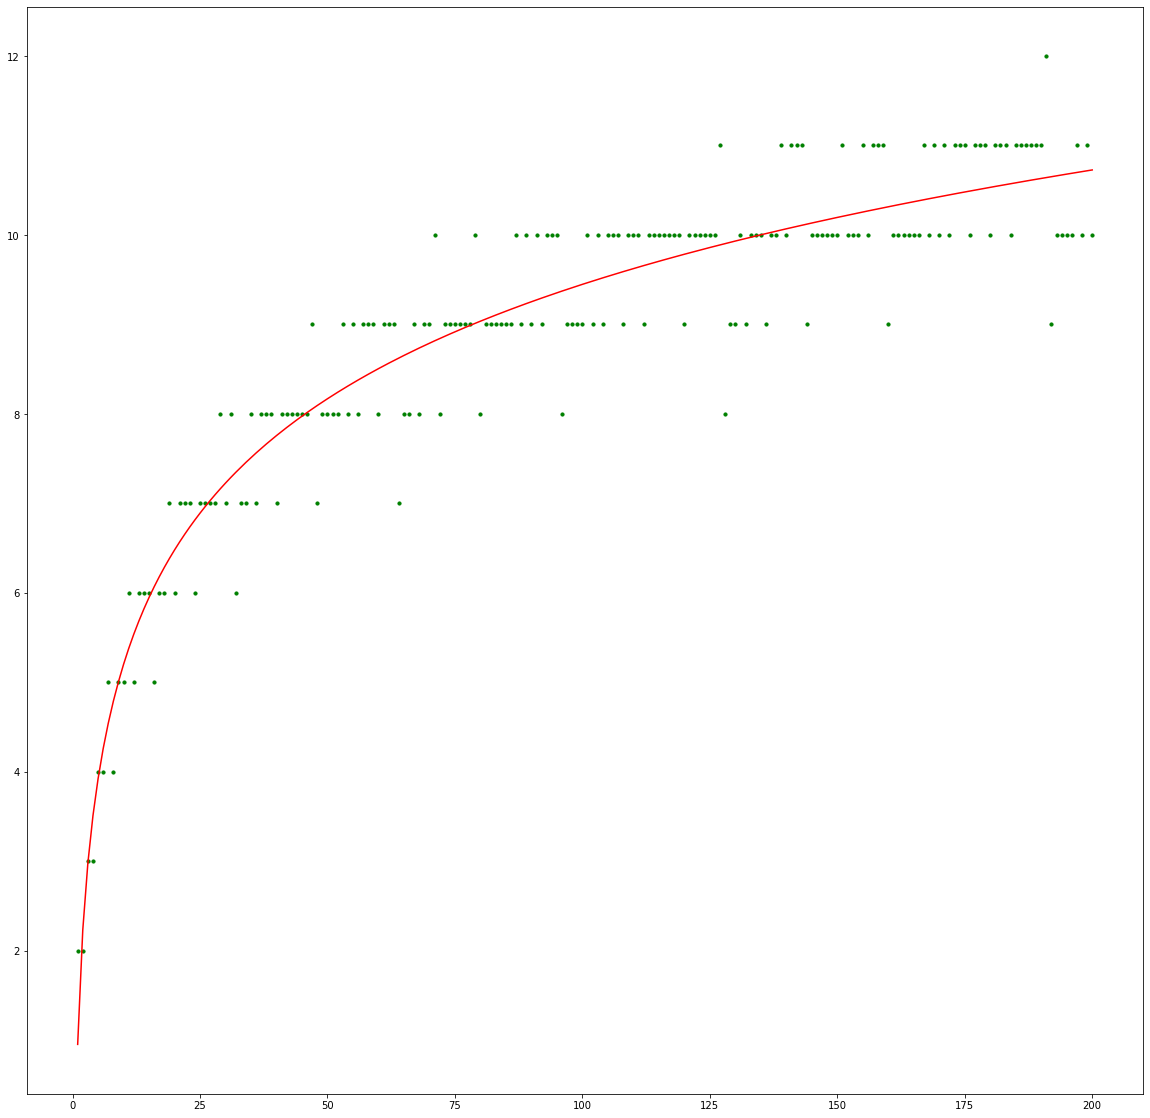

In [25]:
import pylab as plt

def leastSqare(n, l_n):
    mat = matrix([[sum([float((log(i)**2)) for i in n]), sum([float(log(i)) for i in n])], [sum([float(log(i)) for i in n]), len(n)]])
    vec = vector([sum([float(l_n[i] * log(n[i])) for i in range(len(n))]), sum(l_n)])
    return mat.solve_right(vec)

def l(n):
    return len(splittingVectorOfIndices(n))
    
n = [i for i in range(1,201)]
l_n = [l(i) for i in range(1,201)]        
plt.figure(figsize = (20, 20))
plt.scatter(n, l_n, color = 'green', marker = 'o', s = 10)
result = leastSqare(n, l_n)
plt.plot(n, [result[0] * log(i) + result[1] for i in n], color = 'red')
plt.show()

#### Вывод: 
По графику становится понятно, что функция $l(n)$ (зеленые точки) апроксимируется логарифмической (красной) кривой. Это означает что $l(n)$ эквивалентна логарифмической функции на бесконечности: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = \lim\limits_{x\to\infty} \cfrac{\log(n)}{\lceil log_2(n) \rceil} = 1$. 
##### Следствие доказано!

### 5 задание: Проверка гипотезы Шольца-Брауэра

Формулировка гипотезы: $l^*(2^n-1)\leqslant l^*(n)+n-1$, где $l^*(n)$ - длинна звездной цепочки.
#### Ниже представлена реализация алгоритма, производящего проверку гипотезы для n = (1, 10], где длинна звездной цепочки рассчитывается как длинна минимальной цепочки, рассчитанной алгоритмом дробления вектора индексов:

In [45]:
n = int(input("Введите значение n: "))
print("l*(2^n - 1) =", len(splittingVectorOfIndices(2 ** n -  1)))
print("l*(n) + n - 1 =", len(splittingVectorOfIndices(n)) + n - 1)

Введите значение n: 2
l*(2^n - 1) = 3
l*(n) + n - 1 = 3


В таблице приведены значения $l^*(2^n-1)$ и $l^*(n) + n - 1$ для $n \in (1, 10]$, рассчитанные с помощью программы, реализованной выше:

|Значение $n$|$l^*(2^n-1)$|$\leqslant$|$l^*(n)+n-1$|
|:-:|:-:|:-:|:-:|
|2|3|$\leqslant$|3|
|3|5|$\leqslant$|5|
|4|6|$\leqslant$|6|
|5|8|$\leqslant$|8|
|6|9|$\leqslant$|9|
|7|11|$\leqslant$|11|
|8|11|$\leqslant$|11|
|9|13|$\leqslant$|13|
|10|14|$\leqslant$|14|

#### Вывод: Табличные данные подтверждают гипотезу Шольца-Брауэра для $n \in (1, 10]$.

## Общий вывод
В ходе выполнения практической работы были сформированы представления об аддитивных цепочках, выработано умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привит навык использования системы компьютерной алгебры SageMath для реализации алгоритмов.

Были реализованы и исследованы следующие алгоритмы формирования аддитивных цепочек:
* Бинарный метод;
* Метод множителей;
* Алгоритм Брауэра;
* Алгоритм дробления вектора индексов.

Помимо этого были проверены первое следствие теоремы Брауэра для $n \in [1, 200]$ и гипотеза Шольца–Брауэра для $n \in (1, 10]$.